<h1> Spam Filter using Machine Learning </h1>
<p> In this project, we will build a spam filter using machine learning. We will use the SMS Spam Collection dataset from the UCI Machine Learning Repository. The dataset contains 5,572 SMS messages that are already classified as spam or ham (not spam).</p>

# PHASE 1: Data Ingestion and Cleaning 
### Loading and Exploring the Dataset 
<p> We will start by loading the dataset and exploring it. </p>

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('spam.csv', header=0, encoding='latin-1')

# Check first few rows
data.head

<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  

### Data Cleaning
<p>In this cell we will accomplish 2 tasks:</p>
<ol style="margin-left: 4">
  <li>Drop the missing values in the last 3 columns. This can be done using two methods:
    <ul style="margin-left: 0; padding-left: 0;">
      <li>Drop the rows with missing values</li>
      <li>Impute the missing values</li>
    </ul>
    The approach depends on the amount of missing data and the importance of the missing data. In this case, we will drop the missing values in the last 3 columns using the <code>pd.drop()</code> method as we can discard entire columns given our initial exploration of how much missing data there is.
  </li>
  <li>Rename the first two columns as 'target' and 'text' which is much more intuitive to understand.</li>
</ol>


In [2]:
# Drop missing values in the last 3 columns, you can also use drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
data = data.dropna(axis=1)
# Rename the first two columns
data.columns = ['target', 'text']
# Check the first few rows
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Encoding the target column and cleaning duplicates
<p>We will encode the target column to numerical values. We will use the <code>LabelEncoder</code> class from the <code>sklearn.preprocessing</code> module to encode the target column to numerical values.<p>

In [3]:
from sklearn.preprocessing import LabelEncoder
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Encode the target column
data['target'] = LabelEncoder().fit_transform(data['target'])
# Unsuppressed warnings
warnings.filterwarnings('default')

<p>Counting duplicates in the dataset can be done using the <code>pd.duplicated().sum()</code> method. We will check for duplicates in the dataset and remove them if they exist using the <code>pd.drop_duplicates()</code> method.</p> 

In [4]:
# Check for duplicates and count them
duplicates = data.duplicated().sum()
print(f"Duplicates : {duplicates}")

# Drop duplicates
data = data.drop_duplicates()

Duplicates : 403


# PHASE 2: Data Visualization 
### Visualizing the data using plots. 
<p> We will visualize the data using plots to understand the distribution of spam and ham messages in the dataset.</p>

C:\Users\Archit\miniforge3\lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


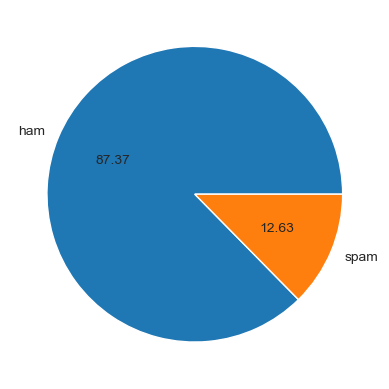

In [5]:
import matplotlib.pyplot as plt

#--- WRITE YOUR CODE FOR TASK 1 ---
values = data['target'].value_counts()

#--- Inspect data ---
plt.pie(values, labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

### Visualizing the statistics for the "text" feature and add them to the feature set
<p> Import the nltk (Natural Language Toolkit) library and download the 'punkt' package which allows the use of tokenizers.</p>

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Archit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<p> We will visualize the length of messages using the number of characters in the messages. We will add this as a new feature to the dataset.</p>

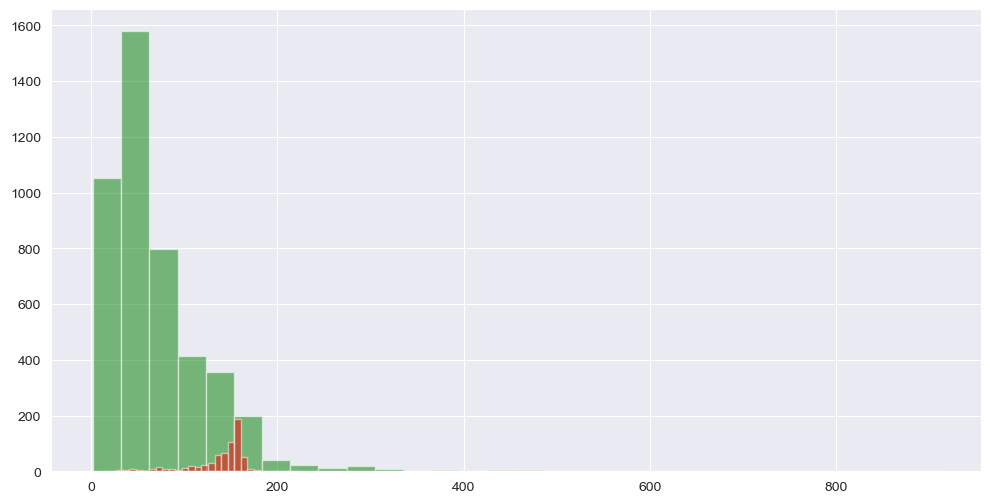

In [7]:
data['num_char'] = data['text'].apply(len)

# Visualize the length of messages
plt.figure(figsize = (12, 6))
plt.hist(data[data['target'] == 0]['num_char'], color='green', alpha=0.5, label='Ham', bins=30)
plt.hist(data[data['target'] == 1]['num_char'], color='red', alpha=0.5, label='Spam', bins=30)
plt.show()


<p> Visualize and store number of words in the messages as a new feature in the dataset. For this we will use the NLTK(Natural Language Tool Kit)</p>

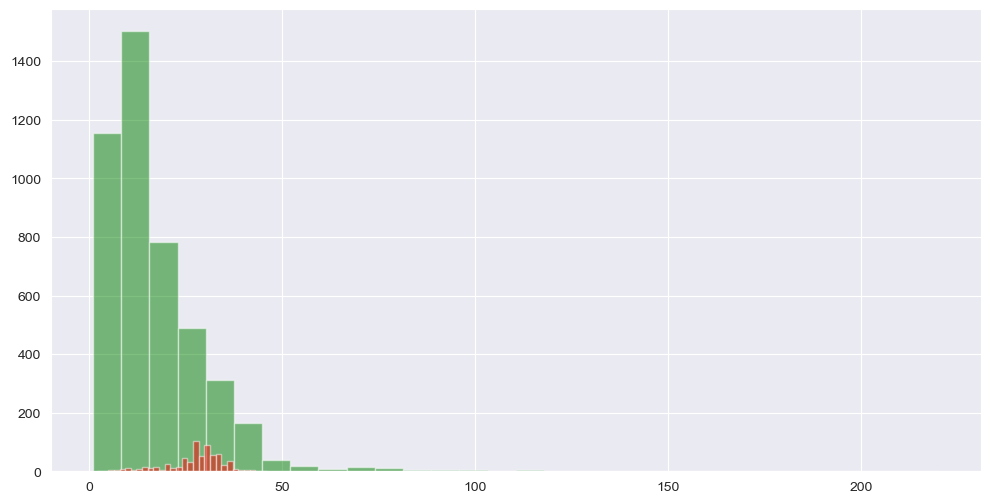

In [8]:
from nltk.tokenize import word_tokenize

# Add a new feature to the dataset
data['num_words'] = data['text'].apply(lambda x: len(word_tokenize(x)))

# Visualize the number of words in messages
plt.figure(figsize = (12, 6))
plt.hist(data[data['target'] == 0]['num_words'], color='green', alpha=0.5, label='Ham', bins=30)
plt.hist(data[data['target'] == 1]['num_words'], color='red', alpha=0.5, label='Spam', bins=30)

plt.show()

<p> Visualize the sentence count in the messages and store it as a new feature in the dataset.</p>

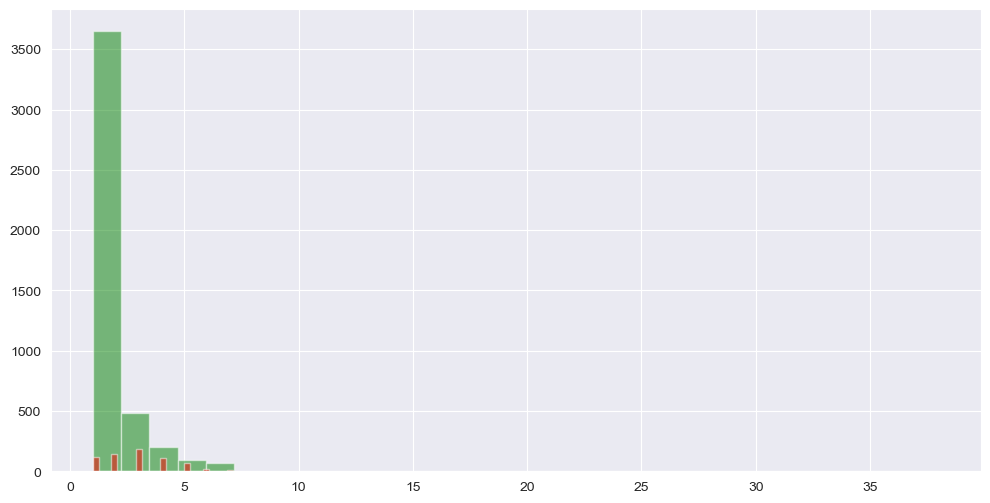

In [9]:
from nltk.tokenize import sent_tokenize

# Add a new feature to the dataset
data['num_sentences'] = data['text'].apply(lambda x: len(sent_tokenize(x)))

# Visualize the number of sentences in messages
plt.figure(figsize = (12, 6))
plt.hist(data[data['target'] == 0]['num_sentences'], color='green', alpha=0.5, label='Ham', bins=30)
plt.hist(data[data['target'] == 1]['num_sentences'], color='red', alpha=0.5, label='Spam', bins=30)

plt.show()

<p> Visualize the correlation between the features using a heatmap with seaborn (remember - correlation does not imply causation ;)).</p>

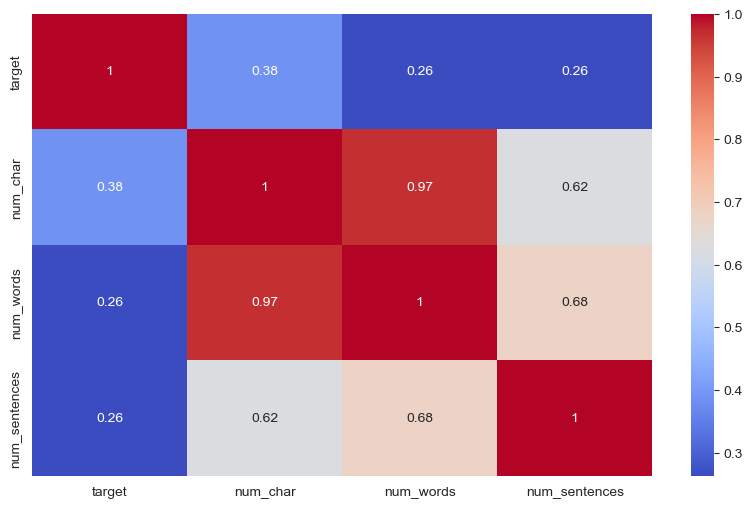

In [10]:
import seaborn as sns

# Create a correlation matrix without the text column
correlation = data.drop(columns='text').corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

# PHASE 3: Data Preprocessing 
### Data Preprocessing by removing stopwords, punctuation and stemming the words

<p> We will preprocess the text data by removing stopwords, punctuation and stemming the words. We will use the NLTK library for this purpose and store the cleaned data as a new feature.</p>

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# Download the stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Get the stopwords and punctuation
stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Initialize the stemmer
stemmer = PorterStemmer()

# Function to preprocess the text data
def preprocess(text):
    # Lowercase the text
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove the stopwords and punctuation
    words = [stemmer.stem(word) for word in words if word not in stopwords and word not in punctuation]
    # Join the words back
    text = ' '.join(words)
    return text

# Apply the preprocess function to the text column
data['cleaned_text'] = data['text'].apply(preprocess)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Archit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Archit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Building wordclouds for spam and ham messages before moving on to build model for classification
<p> We will build wordclouds for spam and ham messages to visualize the most frequent words in the messages using the wordcloud libraries.</p>

In [12]:
from wordcloud import WordCloud

def build_wordcloud(word_data):
    cloud = WordCloud(width=800, height=400).generate(word_data)
    # Display the wordcloud
    plt.figure(figsize=(10, 5))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

C:\Users\Archit\miniforge3\lib\site-packages\wordcloud\wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Users\\Archit\\miniforge3\\lib\\site-packages\\wordcloud\\stopwords' mode='r' encoding='cp1252'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


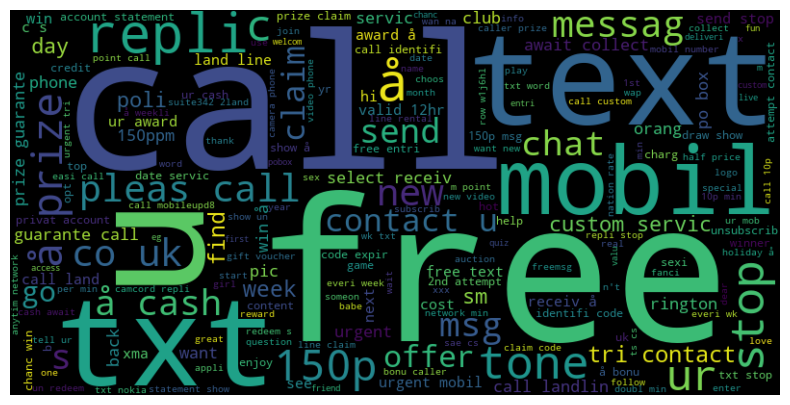

In [13]:
# Build wordcloud for spam messages
spam_words = ' '.join(data[data['target'] == 1]['cleaned_text'])
build_wordcloud(spam_words)

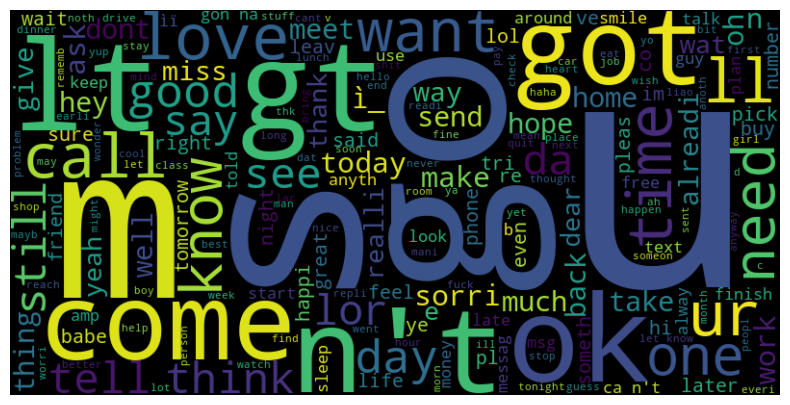

In [14]:
# Build wordcloud for ham messages
ham_words = ' '.join(data[data['target'] == 0]['cleaned_text'])
build_wordcloud(ham_words)

# PHASE 4: Machine Learning Wizardry
### Vectorizing the text data using TF-IDF and building the classification model

<p> We will vectorize the text data using the TF-IDF (Term Frequency-Inverse Document Frequency) method. We will use the <code>TfidfVectorizer</code> class from the <code>sklearn.feature_extraction.text</code> module to vectorize the text data.</p>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)

X, y = data['cleaned_text'], data['target']
X = tfidf.fit_transform(X).toarray()

### Splitting the data into training and testing sets
<p> We will split the data into training and testing sets using the <code>train_test_split</code> method from the <code>sklearn.model_selection</code> module.</p>


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PHASE 5 : Building multiple classification models for spam detection and brief benchmarking study
### Naive Bayes Classifier


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the model
gaussian_naive_bayes = GaussianNB()

# Train the model
gaussian_naive_bayes.fit(X_train, y_train)

# Predict the target values
y_pred = gaussian_naive_bayes.predict(X_test)

# Calculate the accuracy
accuracy_naive_bayes = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_naive_bayes}")

# Classification report
classification_naive_bayes = classification_report(y_test, y_pred)
print(f"Classification Report:\n{classification_naive_bayes}")


### Multinomial Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the model
multinomial_naive_bayes = MultinomialNB()

# Train the model
multinomial_naive_bayes.fit(X_train, y_train)

# Predict the target values
y_pred = multinomial_naive_bayes.predict(X_test)

# Calculate the accuracy
accuracy_multinomial_naive_bayes = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_multinomial_naive_bayes}")

# Classification report
classification_multinomial_naive_bayes = classification_report(y_test, y_pred)
print(f"Classification Report:\n{classification_multinomial_naive_bayes}")
